<a href="https://colab.research.google.com/github/candybains/Predict-CO2-Emissions-in-Rwanda/blob/main/Carbon_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

from sklearn.svm import SVR
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None
from matplotlib import pyplot as plt
import seaborn as sns
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
#!pip install scikit-learn==1.3.1



In [ ]:
# Load files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
samplesubmission = pd.read_csv('/content/sample_submission.csv')

# Preview train dataset
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732


In [ ]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.02734,8472.31348,41047.93750,7472.31348,7.93562,0.24077,-100.11379,33.69704,-133.04755,33.77958
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,48539.73724,6476.14732,54915.70858,5476.14716,11.44844,0.29312,-30.51032,42.40259,-138.63282,31.01238
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,34133.08047,8984.79570,39006.09375,7984.79570,10.75318,0.26713,39.08736,45.93648,-144.78499,26.74336
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,50854.99108,6014.72406,57646.36837,5014.72412,11.76456,0.30468,-24.46513,42.14042,-135.02789,29.60477
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,46594.68514,6849.28048,52896.54187,5849.28039,13.06532,0.28422,-12.90785,30.12264,-135.50012,26.27681


In [ ]:
train.shape, test.shape, samplesubmission.shape

((79023, 76), (24353, 75), (24353, 2))

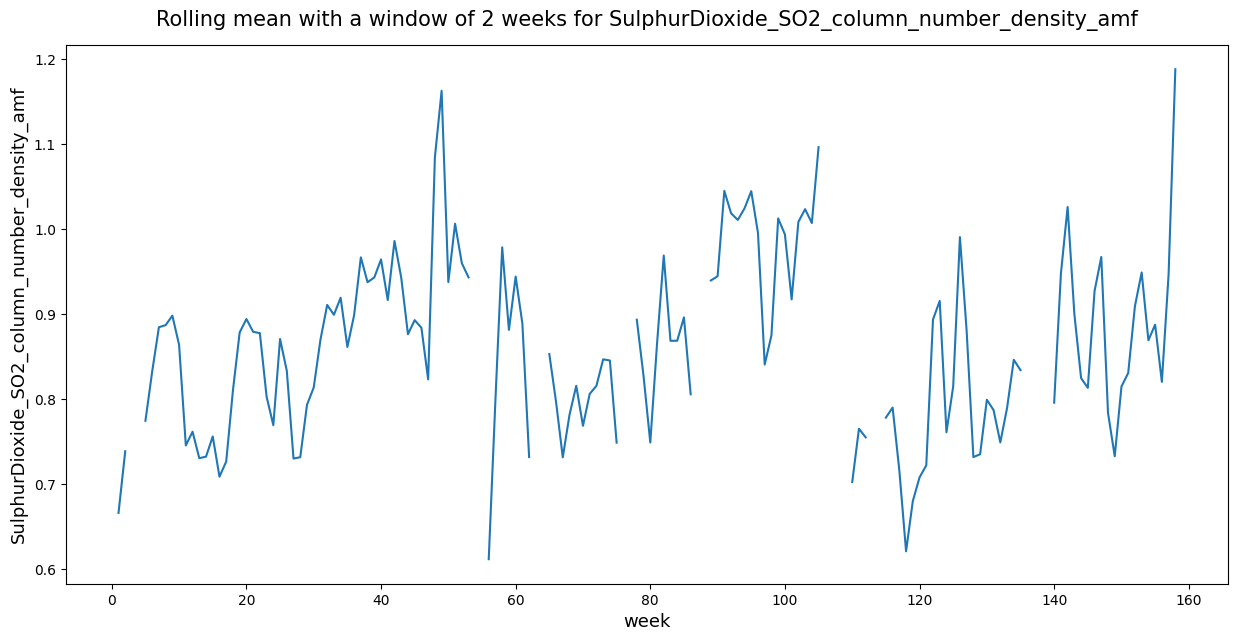

In [ ]:
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-0.51_29.29']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize = (15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

In [ ]:
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]



In [ ]:
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]

test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns = [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,0.00031,0.64814,0.00021,0.03993,17.09193,27.74483,-138.71941,29.47540,0.00011,0.03772,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,0.00026,0.65101,0.00017,0.14045,15.05711,49.37580,-144.95421,25.93065,0.00007,0.03877,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,0.00002,0.63872,0.00003,0.20269,74.18022,37.25428,-144.39710,23.06746,0.00001,0.03949,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [ ]:
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Preview engineered test set
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [ ]:
X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train_eng.emission

# Splitting the data into training and testing sets



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=2023)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(f'RMSE Score: {mean_squared_error(y_test, y_pred)}')

RMSE Score: 756.3887102605894


In [ ]:
X_test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
42962,-1.96800,30.93200,2019,32,-0.00031,0.71053,-0.00022,0.05047,16.57960,45.51030,...,57419.29103,5330.79123,61552.54148,4654.78256,10.79548,0.24813,-31.46791,47.36010,-49.75059,28.81543
20489,-1.32700,30.97300,2021,31,-0.00005,0.83240,-0.00004,0.10846,17.56284,35.96635,...,61520.93314,4065.66013,69494.58153,3112.44794,10.74455,0.21591,6.19150,43.89503,-43.85110,28.08377
49300,-2.17100,28.62900,2019,10,0.00008,0.82463,0.00006,0.09100,74.80393,32.09079,...,48901.16490,4626.37383,54412.81630,3896.92843,24.60350,0.26977,-2.84187,38.80104,-98.31160,19.79850
13289,-1.11700,29.88300,2020,39,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,52079.15598,5787.26982,58881.23696,4798.99914,28.16117,0.26420,10.87889,40.55605,-92.68547,23.21665
31375,-1.64100,31.25900,2019,52,0.00004,0.75535,0.00003,0.22451,75.46359,25.12664,...,44224.48788,7041.88831,50164.00427,6057.84949,15.27048,0.26619,11.59058,37.11346,-140.04970,29.57884


In [ ]:
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
46437,-2.07900,29.32100,2019,9,1044.48450,2918.38815,1873.90365
46490,-2.07900,29.32100,2020,9,1011.02600,2802.89184,1791.86584
56674,-2.37800,29.22200,2020,17,1502.66770,2072.05161,569.38391
56679,-2.37800,29.22200,2020,22,1689.61380,2221.26626,531.65246
56671,-2.37800,29.22200,2020,14,1777.71030,2247.92992,470.21962


In [ ]:
pred_errors.tail()

,latitude,longitude,year,week_no,emission,prediction,error
33962,-1.73000,28.47000,2020,42,0.00000,0.00000,0.00000
33999,-1.73000,28.47000,2021,26,0.00000,0.00000,0.00000
20584,-1.32800,28.87200,2020,20,0.00000,0.00000,0.00000
33869,-1.73000,28.47000,2019,2,0.00000,0.00000,0.00000
28239,-1.53200,28.56800,2020,43,0.00000,0.00000,0.00000


In [ ]:
#X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
D_train = xgb.DMatrix(X_train, label=y_train)

param = {
    'eta': 0.1,
    'reg_lambda' : 1.5,
    'max_depth': 500
    }

steps = 100


model = xgb.train(param, D_train, steps)

# model = XGBRFRegressor(tree_method="hist", eval_metric = mean_squared_error, random_state = SEED, n_jobs=-1)
# model.fit(X_train, y_train)

In [ ]:
D_test = xgb.DMatrix(X_test)
y_xgb_pred = model.predict(D_test)

In [ ]:
print(f'RMSE Score: {mean_squared_error(y_test, y_xgb_pred)}')

RMSE Score: 560.5289511953702


In [ ]:
D_test

In [ ]:
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_xgb_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

,latitude,longitude,year,week_no,emission,prediction,error
46543,-2.07900,29.32100,2021,9,2730.65900,931.89325,1798.76575
56674,-2.37800,29.22200,2020,17,1502.66770,2133.84229,631.17459
56679,-2.37800,29.22200,2020,22,1689.61380,2143.86987,454.25607
56671,-2.37800,29.22200,2020,14,1777.71030,2208.51953,430.80923
56727,-2.37800,29.22200,2021,17,2016.59630,2391.44312,374.84682


In [ ]:
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
D_test_df = xgb.DMatrix(test_df)
predictions = model.predict(D_test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4.21162
1,ID_-0.510_29.290_2022_01,4.44930
2,ID_-0.510_29.290_2022_02,4.46393
3,ID_-0.510_29.290_2022_03,4.39398
4,ID_-0.510_29.290_2022_04,4.52510


In [ ]:
sub_file.to_csv('BaselineSubmission.csv', index = False)